In [129]:
!pip install pymongo

You should consider upgrading via the '/Users/long.th/.pyenv/versions/3.6.8/bin/python3.6 -m pip install --upgrade pip' command.


In [130]:
from pymongo import MongoClient

In [131]:
# * VERY IMPORTANT TO CONFIG HERE
mongo_url = 'mongodb://localhost'
db_name = 'test'
collection_name = 'test_collection'
column_name = 'data'

client = MongoClient(mongo_url)
db=client[db_name]
collection = db[collection_name]

In [132]:
import pandas as pd
data = pd.DataFrame( list(collection.find({})))
data.head()

,_id,time,data,topic,partition
0,61712091f5996a6c0f330abb,15:10:57,b'{}',test-topic,0


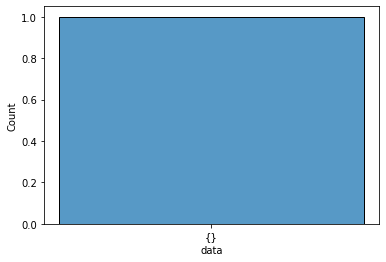

In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(data=data, x=column_name)
plt.show()

# Test section

In [134]:
# testing generating data and plotting
test_collection_name = 'normal_distribution'
db.create_collection(test_collection_name)
collection = db[test_collection_name]

In [135]:
import numpy as np
data = np.random.normal(1000, 1000, size=10000)
data

array([ 1306.03140443,  1058.43678352,  1008.86002046, ...,
        -212.93074832, -1027.20046965,  1651.64204204])

In [136]:
column_name = 'data'
df = pd.DataFrame(data, columns=[column_name])
df.head()

,data
0,1306.031404
1,1058.436784
2,1008.860020
3,1525.264632
4,551.065413


In [137]:
input_dict = df.to_dict('records')
input_dict[0:5] #head

[{'data': 1306.0314044284946},
 {'data': 1058.4367835161167},
 {'data': 1008.8600204566434},
 {'data': 1525.2646321042382},
 {'data': 551.0654133093093}]

In [138]:
collection.insert_many(input_dict)

In [139]:
data = pd.DataFrame( list(collection.find({})))
print(data.count())
data.head()

_id     10000
data    10000
dtype: int64


,_id,data
0,6177bb77e022c563a0a675bf,1306.031404
1,6177bb77e022c563a0a675c0,1058.436784
2,6177bb77e022c563a0a675c1,1008.860020
3,6177bb77e022c563a0a675c2,1525.264632
4,6177bb77e022c563a0a675c3,551.065413


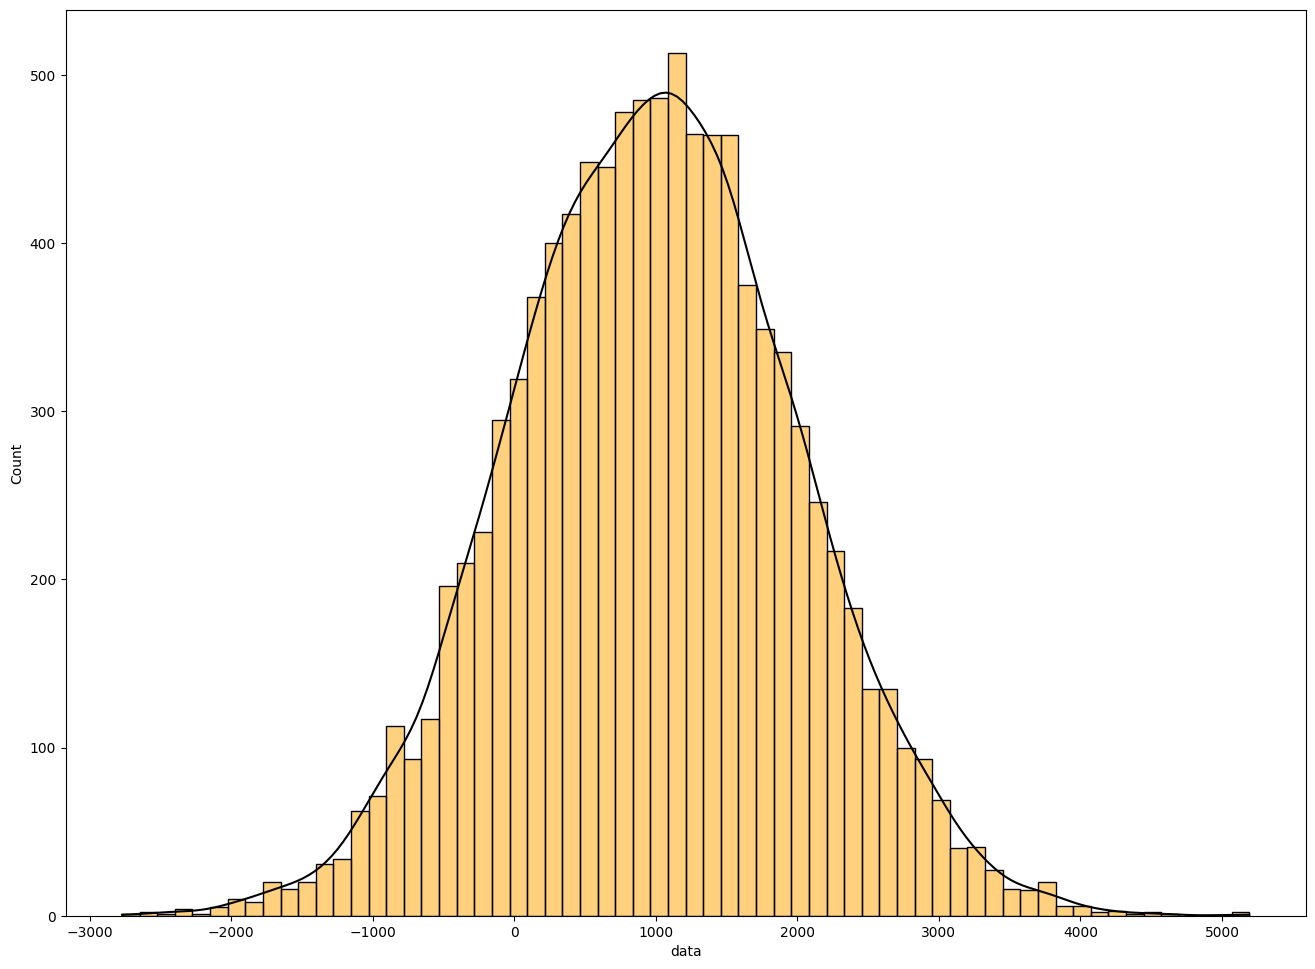

In [140]:
plt.figure(figsize=(16, 12), dpi=100)
ax = sns.histplot(data=data, x=column_name, color='orange', kde=True)
ax.lines[0].set_color('black')
plt.show()

In [141]:
collection.drop()